In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

submissions = pd.read_csv('./submissions.csv')
theia_sessions = pd.read_csv('./theia_sessions.csv')

In [2]:
submissions['created'] = submissions['created'].apply(pd.to_datetime)

assignment_id
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
5    AxesSubplot(0.125,0.2;0.775x0.68)
6    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

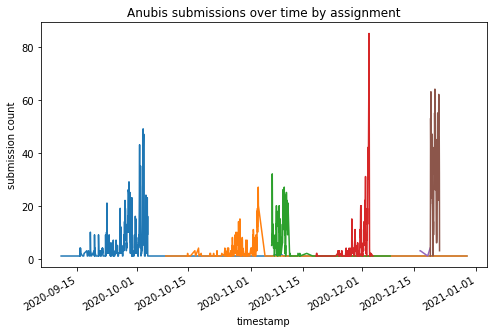

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
submissions.groupby(['assignment_id', 'created'])['id'].count().reset_index().rename(columns={'id':'count'}).groupby('assignment_id')\
  .plot(x='created', xlabel='timestamp', y='count', ylabel='submission count', legend=False, title='Anubis submissions over time by assignment', ax=ax)

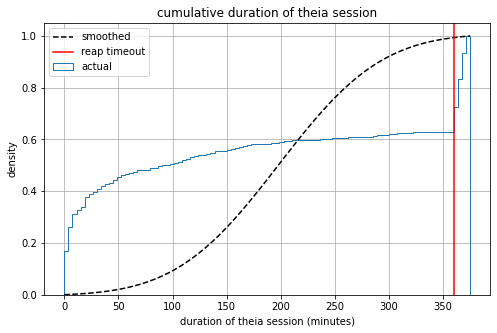

In [4]:
mu = 200
sigma = 75
n_bins = 100

fig, ax = plt.subplots(figsize=(8, 5))

n, bins, patches = ax.hist(theia_sessions['duration'], n_bins, density=True, histtype='step', cumulative=True, label='actual')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='smoothed')

ax.axvline(x=360, color='red', label='reap timeout')

ax.grid()
ax.legend(loc='upper left')
ax.set(title='cumulative duration of theia session', xlabel='duration of theia session (minutes)', ylabel='density')
plt.show()